# <center>[The Ultimate Python Seaborn Tutorial](https://elitedatascience.com/python-seaborn-tutorial)

### Content
1. [lmplot()](#1.-lmplot)
2. [boxplot()](#2.-boxplot)
3. [violinplot()](#3.-violinplot)
4. [swarmplot()](#4.-swarmplot)
5. [pd.melt()](#5.-pd.melt)
6. [heatmap()](#6.-heatmap)
7. [distplot() - Histogram](#7.-distplot-Histogram)
8. [countplot() - Bar Plot](#8.-countplot-Bar-Plot)
9. [catplot()/factorplot()](#9.-catplot/factorplot)
10. [kdeplot() - Density Plot](#10.-kdeplot-Density-Plot)
11. [jointplot() - Joint Distribution Plot](#11.-jointplot-Joint-Distribution-Plot)

**Import dependencies**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Read and show the dataset **

In [4]:
df = pd.read_csv('./Pokemon.csv',index_col=0, encoding = 'utf-8')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


### 1. lmplot

This is a scatter plot with an option of fitting a line to the data. For example, if we want to investigate the relation between the `Attack` and `Defense` feature, we can simpliy `lmplot` them as:

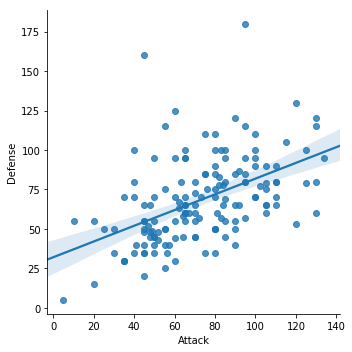

In [9]:
plt.rcParams['figure.figsize'] = 10,8
sns.lmplot(x='Attack', y='Defense',data=df)

or we can turn on/off the fit line by setting the flag `fit_reg=False`

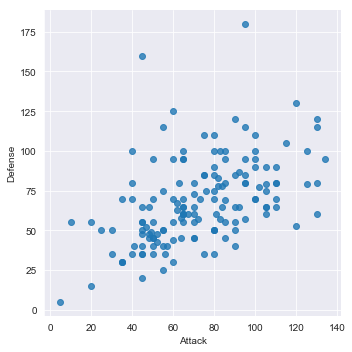

In [66]:
plt.rcParams['figure.figsize'] = 8,10
sns.lmplot(x='Attack', y='Defense',data=df, \
           fit_reg=False #remove the fit line
          )

The `hue` param allows us to present a third dimension of information using color

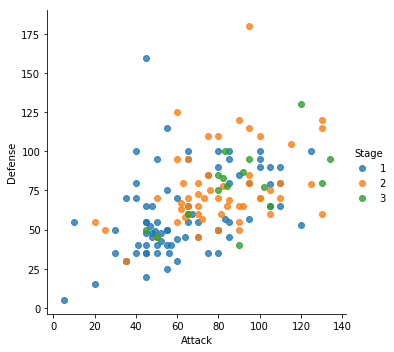

In [15]:
plt.rcParams['figure.figsize'] = 10,8
sns.lmplot(x='Attack', y='Defense',data=df, \
           fit_reg=False, #remove the fit line
           hue='Stage'
          )

We can also adjust the range of the plot by using `plt.xlim()` and `plt.ylim()`

(40, 190.44212186867063)

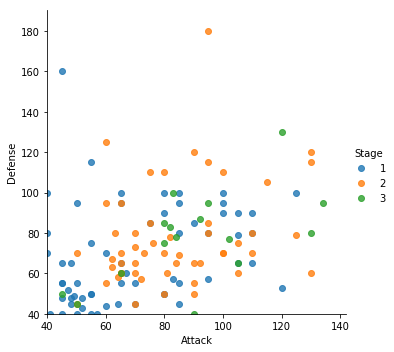

In [18]:
plt.rcParams['figure.figsize'] = 10,8
sns.lmplot(x='Attack', y='Defense',data=df, \
           fit_reg=False, #remove the fit line
           hue='Stage'
          )

plt.xlim(40,None)
plt.ylim(40,None)

We can also set theme for the plot

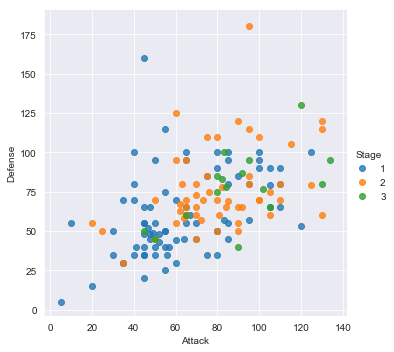

In [21]:
#the 2 available themes
sns.set_style('whitegrid')
sns.set_style('darkgrid')

#plot
plt.rcParams['figure.figsize'] = 10,8
sns.lmplot(x='Attack', y='Defense',data=df, \
           fit_reg=False, #remove the fit line
           hue='Stage'
          )

### 2. boxplot

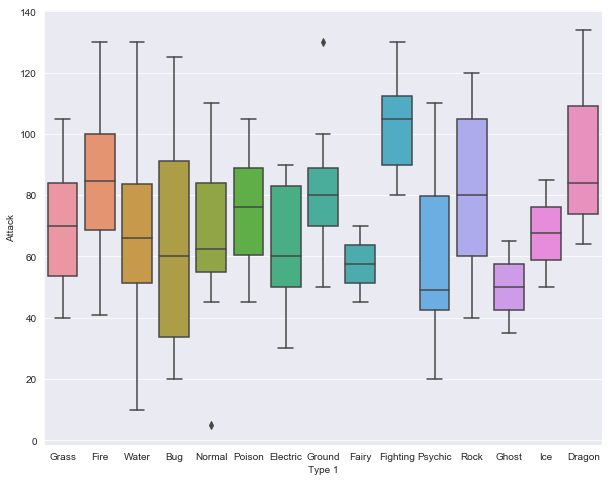

In [30]:
sns.boxplot(x='Type 1', y='Attack', data=df)

### 3. violinplot

Violin plots are useful alternatives to box plots.

They show the distribution (through the thickness of the violin) instead of only the summary statistics.

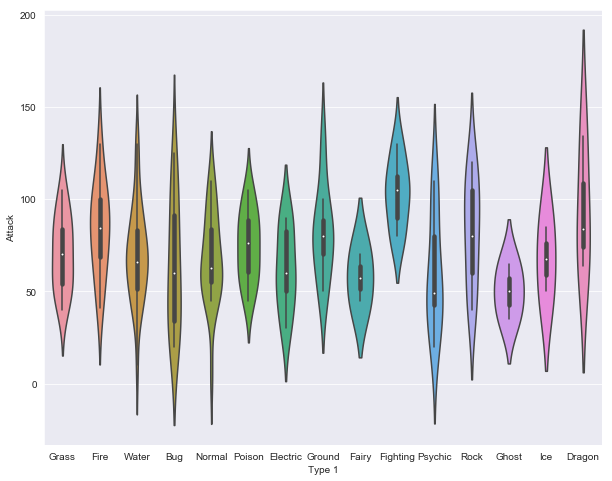

In [32]:
#afternative to boxplot()
sns.violinplot(x='Type 1', y='Attack', data=df)

We can remove the bar inside the violine by setting the flag `inne=None`

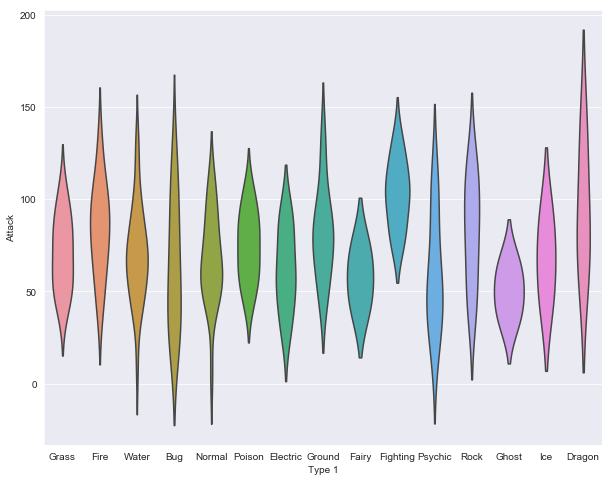

In [33]:
sns.violinplot(x='Type 1',
               y='Attack',
               data=df,
               inner=None #remove the inner bar
              )

### 4. swarmplot

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:

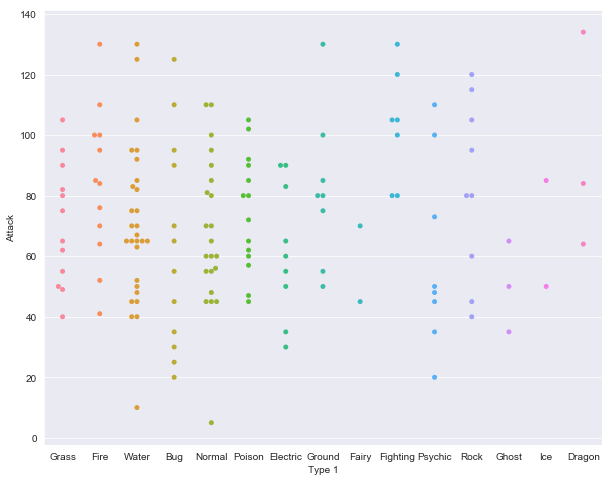

In [36]:
sns.swarmplot(x='Type 1', y='Attack',data=df)

One plot can overlay the other making a combined plot

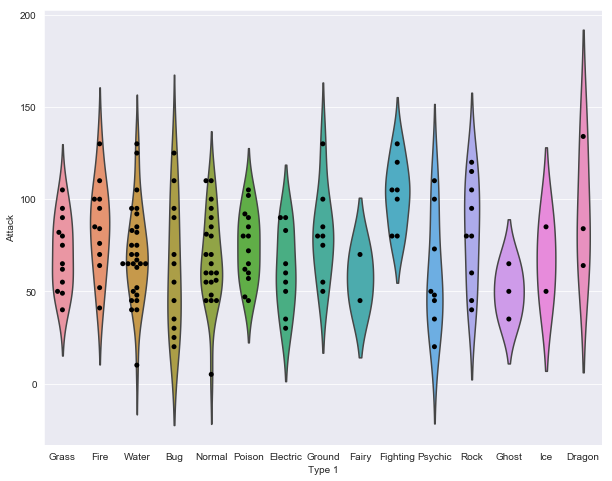

In [37]:
#1st plot
sns.violinplot(x='Type 1',
               y='Attack',
               data=df,
               inner=None #remove the inner bar
              )
#2nd plot
sns.swarmplot(x='Type 1',
              y='Attack',
              color='k', #set the color to black one
              data=df)

### 5. pd.melt

Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

In [42]:
#we temporarily remove the Total, Stage and Legendary features
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

First, here's a reminder of our data format:

In [43]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

To do so, we'll use pandas' `melt()` function. It takes in 3 arguments:
- First, the DataFrame to melt
- Second, `id_vars` ID variables to be kept(Pandas will melt all of the rest)
- Third, `var_name` the name of the new, melted variable

In [45]:
melted_df = pd.melt(df, 
                    id_vars=['Name','Type 1', 'Type 2'], #variable to keep
                    var_name='Stat' # new melted variable name
                   )
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,Total,318
1,Ivysaur,Grass,Poison,Total,405
2,Venusaur,Grass,Poison,Total,525
3,Charmander,Fire,NaN,Total,309
4,Charmeleon,Fire,NaN,Total,405


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In fact, if you print the shape of these two DataFrames...

In [46]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(1359, 5)


...you'll find that `melted_df` has 6 times the number of rows as `stats_df`.

Now we can make a swarm plot with `melted_df`.

But this time, we're going to set `x='Stat'` and `y='value'` so our swarms are separated by stat.
Then, we'll set `hue='Type 1'` to color our points by the Pokémon type.

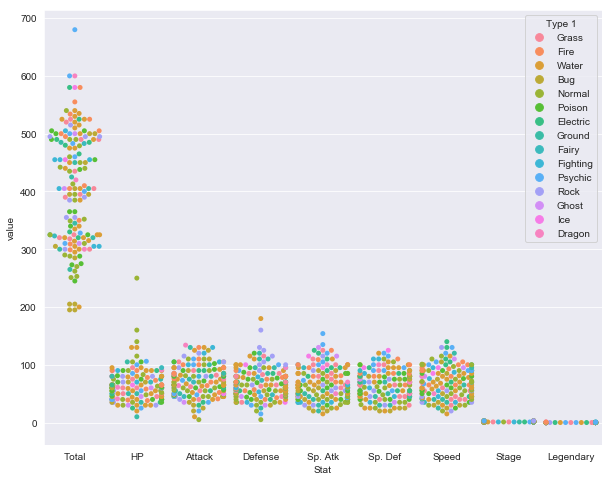

In [48]:
sns.swarmplot(x='Stat',y='value',data=melted_df, hue='Type 1')

Finally, let's make a few final tweaks for a more readable chart:
1. Enlarge the plot.
2. Separate points by hue using the argument `dodge=True` .
3. Use our custom Pokemon color palette.
4. Adjust the y-axis limits to end at 0.
5. Place the legend to the right.

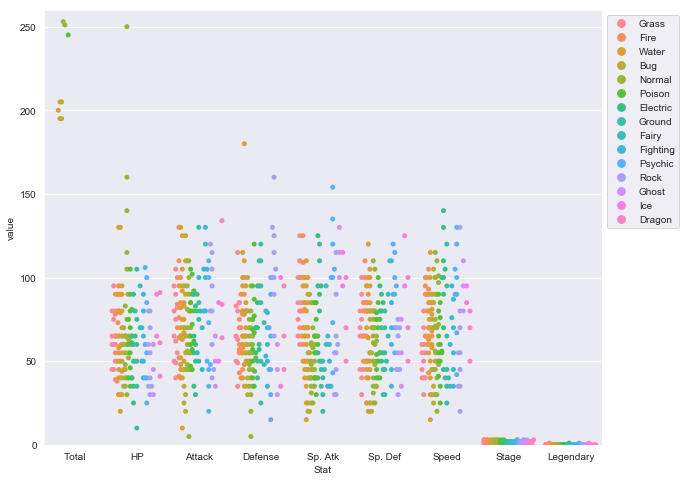

In [52]:
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
             )
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

### 6. heatmap

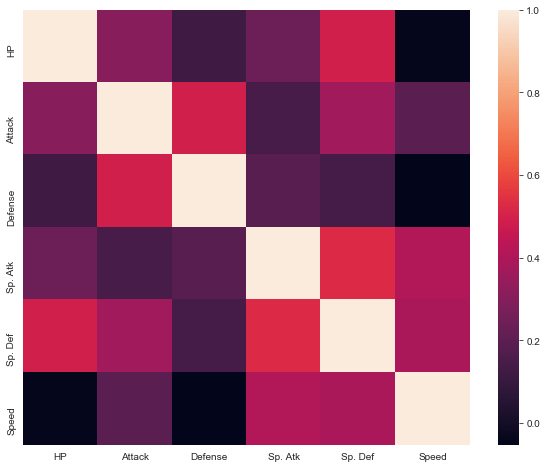

In [53]:
corr = stats_df.corr()

sns.heatmap(corr)

### 7. distplot-Histogram

Histograms allow you to plot the distributions of numeric variables.

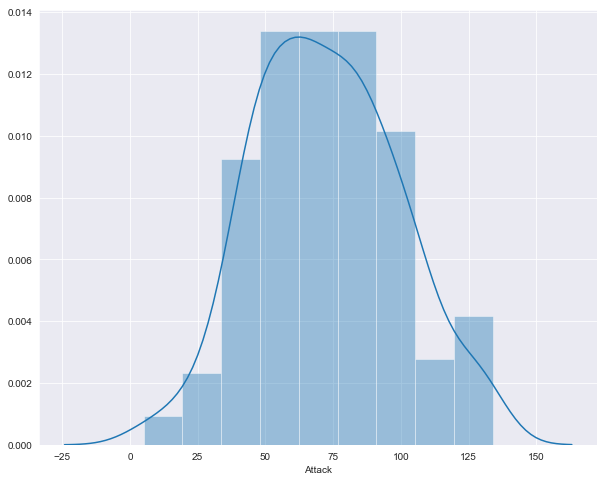

In [54]:
sns.distplot(df.Attack)

### 8. countplot-Bar Plot

Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

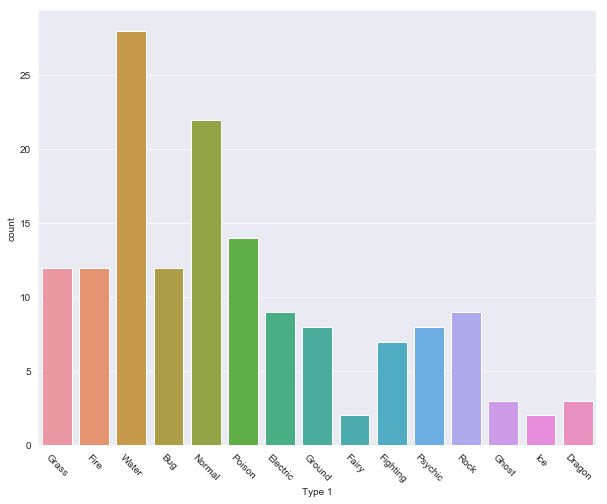

In [56]:
sns.countplot(x='Type 1',data=df)

# Rotate x-labels
plt.xticks(rotation=-45)

### 9. catplot/factorplot

Cat plots (factor plot) make it easy to separate plots by categorical classes.

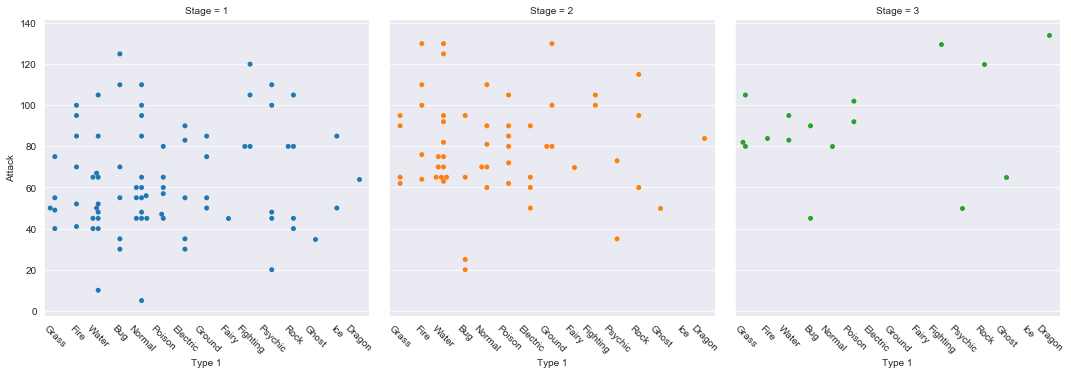

In [63]:
g = sns.catplot(x='Type 1',
            y='Attack',
            data=df, 
            hue='Stage',  # Color by stage
            col='Stage',  # Separate by stage
            kind='swarm') # Swarmplot

# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

### 10. kdeplot-Density Plot

Density plots display the distribution between two variables.

- **Tip:** Consider overlaying this with a scatter plot.

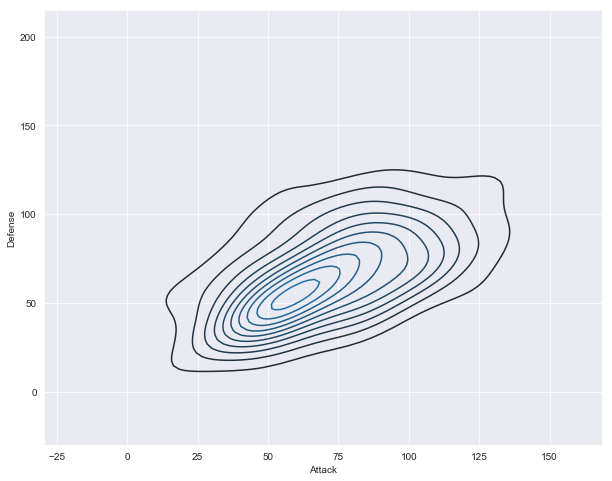

In [64]:
sns.kdeplot(df.Attack, df.Defense)

### 11. jointplot-Joint Distribution Plot

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

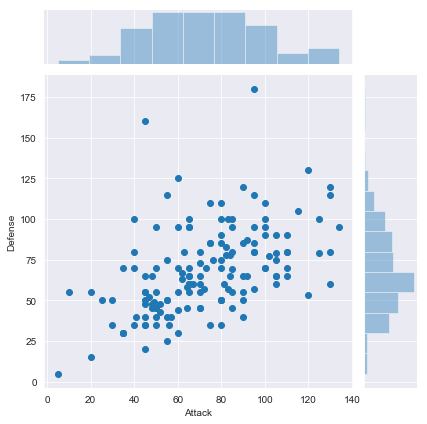

In [65]:
sns.jointplot(x='Attack', y='Defense', data=df)

Congratulations... you've made it to the end of this Python Seaborn tutorial!

We've just concluded a tour of key Seaborn paradigms and showed you many examples along the way. Feel free to use this page along with the [official Seaborn gallery](http://seaborn.pydata.org/examples/) as references for your projects going forward.